_______________________
_______________________
### Assessment for DE Internship at DataGrokr


# This Notebook Contains Implementation of  the GET HTTP method API Using Flask

### Import Required Dependencies

In [ ]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from flask import Flask, jsonify
import json
from sqlalchemy.exc import SQLAlchemyError

### Lets Begin only with Section 1 and Section 3

**Section 1: Environment setup and Data Cleaning**

**Section 3: Exposing results in API**


# SECTION 1

### Load the Data

In [ ]:
df=pd.read_csv('HousingDataset.csv',lineterminator='\n')
df.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,107397,YhXDVa/KIlF7EjJMulHiyA==,Propiedad,2020-03-26,2020-04-08,2020-03-26,-34.562465,-58.465079,Argentina,Capital Federal,...,2.0,NaN,NaN,220000.0,USD,NaN,OPPEL | Departamento en Venta | Cod: 29583,DEPARTAMENTO EN VENTA / ALQUILER | BELGRANO ...,Departamento,Venta
1,918839,jHxD7psAg4+AC07T3sognw==,Propiedad,2020-03-08,2020-03-09,2020-03-08,-37.999235,-57.553724,Argentina,Buenos Aires Costa Atlántica,...,1.0,NaN,NaN,155000.0,USD,NaN,2 AMBIENTES A ESTRENAR CON COCHERA,2 AMBIENTES CON BALCON Y PARRILLA. COCHERALIV...,Otro,Venta
2,204435,IYPdaIGi5Obo4eLzwUY+LA==,Propiedad,2020-10-26,2021-02-03,2020-10-26,-34.453307,-58.649410,Argentina,Bs.As. G.B.A. Zona Norte,...,3.0,900.0,310.0,480000.0,USD,Mensual,"Casa en Venta, Barrio Sta. Barbara","Casa racionalista en tres plantas, con espacio...",Casa,Venta
3,699972,Cc8bVzOhRcPnAYS++8oyMg==,Propiedad,2020-01-07,2020-01-07,2020-01-07,-31.635173,-60.716072,Argentina,Santa Fe,...,4.0,NaN,NaN,34000.0,ARS,Mensual,"Casa en Alquiler en Constituyentes, Santa fe $...",ALQUILER DE CASA DE 3 / 4 DORMITORIOS EN ZONA ...,Casa,Alquiler
4,66130,83DDzQ7686eLxOi9sQNJVA==,Propiedad,2020-05-13,2020-05-17,2020-05-13,NaN,NaN,Argentina,Santa Fe,...,2.0,200.0,200.0,20000.0,ARS,NaN,Laprida 1418,Laprida 1418 - KP27922 - - Aviso publicado po...,Casa,Alquiler


### Data Preprocessing

In [ ]:
df = df.drop(['ad_type', 'title', 'description', 'l4', 'l5', 'l6'], axis=1)
#  Identify and remove the following columns: a. ad_type b. title c. description d. l4 e. l5 f. l6

In [ ]:
df=df.dropna(subset = ['lon', 'lat', 'price_period', 'bedrooms', 'surface_total', 'rooms', 'price', 'surface_covered'])
# Investigate and discard all rows that contain Null values in any of these fields: a. lon b. lat c. price_period d. bedrooms e. surface_total f. rooms g. price h. surface_covered

In [ ]:
property_details = df [['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms',
'surface_total', 'surface_covered']]
# Once cleaning is done, separate the DF into 2 Tables. One with property_details

In [ ]:
property_price_details = df[['id', 'price', 'currency', 'price_period', 'property_type', 'operation_type']]
#  another with property_price_details

In [ ]:
property_details['id']=property_details['id'].str.rstrip('==')

In [ ]:
property_price_details['id']=property_price_details['id'].str.rstrip('==')

In [ ]:
property_price_details['id']

15        5Be4XjP4b1Olk02vXOHLqA
27        V+6946R1DSniL3DToznOBw
99        w0i2gQ7n18T4QYlI3gHjtg
112       +FVdVVYFmNvza0tOpXfi/A
123       Fg4t539n8vLsWIEQbZ4yPw
                   ...          
499985    RmXNws2019JAidTqtzJy2w
499987    JpnJWzch98h+je5JL+ZR0Q
499988    NDC8YYYk9XKMzAfc72yVCw
499991    mH5Ua+P7GkDCS6AkvAMVjg
499997    5WGZjySGb/v71THZsSBd0g
Name: id, Length: 43436, dtype: object

In [ ]:
property_details.isnull().sum()

id                    0
start_date            0
end_date              0
created_on            0
lat                   0
lon                   0
l1                    0
l2                    0
l3                 1380
rooms                 0
bedrooms              0
bathrooms           336
surface_total         0
surface_covered       0
dtype: int64

In [ ]:
property_price_details.isnull().sum()

id                  0
price               0
currency          155
price_period        0
property_type       0
operation_type      0
dtype: int64

### Export These Two Dataframes to MySQL

In [ ]:
import mysql.connector
from sqlalchemy import create_engine,text

In [ ]:
host = 'localhost'
user = 'root'
password = 'admin'
database_name = 'db1'

conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database_name
)


In [ ]:
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database_name}')


In [ ]:
property_details.to_sql('property_details', engine, if_exists='replace', index=False)
property_price_details.to_sql('property_price_details', engine, if_exists='replace', index=False)


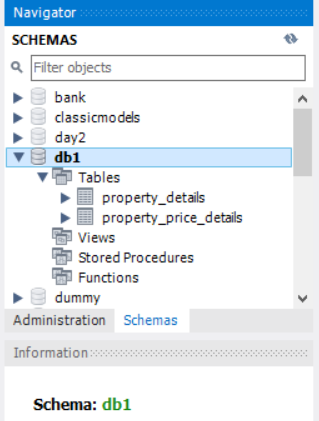

**As Expected The Two Dataframes are Now Successfully Exported to MySql Locally in "db1" DataBase**

# SECTION C : Flask API running Locally  using Get HTTP Method


In [ ]:
from flask import Flask, jsonify
import json
from sqlalchemy.exc import SQLAlchemyError


### Question 1)  Retrieve properties that have a price greater than 1 million and are located in "Estados Unidos" (l1).

access url - http://127.0.0.1:7000/Question1

In [ ]:
app = Flask(__name__)

@app.route('/Question1', methods=['GET'])
def Question_1():
    try:
        query = """
        SELECT pd.*
        FROM proprty_details pd
        JOIN property_price_details ppd ON pd.id = ppd.id
        WHERE ppd.price > 1000000 -- 1 million
        AND pd.l1 = 'Estados Unidos';
        """

        try:
            q1_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500  # HTTP 500 Internal Server Error

        if q1_df.empty:
            return jsonify({"message": "No data found"}), 404  # HTTP 404 Not Found

        response = q1_df.to_json(orient='records', indent=4)

        return response

# Handle other unexpected errors

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.225.20:7000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2023 07:50:15] "GET /Question1 HTTP/1.1" 200 -
127.0.0.1 - - [23/Sep/2023 07:50:15] "GET /favicon.ico HTTP/1.1" 404 -


### Question 2 ) Categorize properties based on their surface area as 'Small' if it's less than 50 square meters, 'Medium' if it's between 50 and 100 square meters, and 'Large' if it's greater than 100 square meters:

access url - http://127.0.0.1:7000/Question2

In [ ]:

app = Flask(__name__)

@app.route('/Question2', methods=['GET'])
def Question2():
    try:
        query = """
        SELECT pd.*,
        CASE
            WHEN pd.surface_total < 50 THEN 'Small'
            WHEN pd.surface_total >= 50 AND pd.surface_total <= 100 THEN 'Medium'
            ELSE 'Large'
        END AS surface_category
        FROM property_details pd;
        """

        try:
            q2_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q2_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q2_df.to_json(orient='records', indent=4)

        return response

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.255.229:7000
Press CTRL+C to quit
127.0.0.1 - - [22/Sep/2023 23:08:23] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2023 23:08:28] "GET /question1 HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2023 23:08:39] "GET /Question2 HTTP/1.1" 200 -


### Question 3 ) List all properties (id) in the "Belgrano" neighborhood (l3) that have the same number of bedrooms and bathrooms as another property in the dataset
access url - http://127.0.0.1:7000/Question3

In [ ]:
@app.route('/Question3', methods=['GET'])
def Question3():
    try:
        query = """SELECT DISTINCT p1.id
        FROM property_details p1
        INNER JOIN property_details p2 ON p1.id <> p2.id
        WHERE p1.l3 = 'Belgrano'
          AND p1.bedrooms = p2.bedrooms
          AND p1.bathrooms = p2.bathrooms;"""

        try:
            q3_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q3_df.empty:
            return jsonify({"message": "No data found"}), 404  # HTTP 404 Not Found

        response = q3_df.to_json(orient='records', indent=4)

        return response

    except Exception as e:

        error_message = str(e)
        return jsonify({"error": error_message}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.225.20:7000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2023 07:51:30] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Sep/2023 07:51:58] "GET /Question3 HTTP/1.1" 200 -


### Question 4) Calculate the average price per square meter (price / surface_total) for each property type (property_type) in the "Belgrano" neighborhood (l3)

access url - http://127.0.0.1:7000/Question4

In [ ]:
app = Flask(__name__)
@app.route('/Question4', methods=['GET'])
def Question4():
    try:
        query = """SELECT
        ppd.property_type,
        AVG(ppd.price / pd.surface_total) AS avg_price_per_sq_meter
        FROM property_details pd
        INNER JOIN property_price_details ppd ON pd.id = ppd.id
        WHERE pd.l3 = 'Belgrano'
        GROUP BY ppd.property_type;"""

        try:
            q4_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q4_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q4_df.to_json(orient='records', indent=4)

        return response

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.225.20:7000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2023 07:53:30] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Sep/2023 07:53:40] "GET /Question4 HTTP/1.1" 200 -


### Question 5)  Identify properties that have a higher price than the average price of properties with the same number of bedrooms and bathrooms.
access url - http://127.0.0.1:7000/Question5


In [ ]:
app = Flask(__name__)
@app.route('/Question5', methods=['GET'])
def Question5():
    try:
        query = """SELECT
        bedrooms,
        bathrooms,
        AVG(price) AS average_price
        FROM
        property_details
        INNER JOIN
        property_price_details ON property_details.id = property_price_details.id
        GROUP BY
        bedrooms, bathrooms;"""

        try:
            q5_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q5_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q5_df.to_json(orient='records', indent=4)

        return response

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.225.20:7000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2023 07:54:58] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Sep/2023 07:55:06] "GET /Question5 HTTP/1.1" 200 -


### Question 6)    Calculate the cumulative price for each property type, ordered by the creation date
access url - http://127.0.0.1:7000/Question6

In [ ]:
app = Flask(__name__)
@app.route('/Question6', methods=['GET'])
def Question6():
    try:
        query = """SELECT
        pd.id,
        ppd.property_type,
        pd.created_on,
        ppd.price,
        SUM(ppd.price) OVER (PARTITION BY ppd.property_type ORDER BY pd.created_on) AS cumulative_price
        FROM
        property_details pd
        INNER JOIN
        property_price_details ppd ON pd.id = ppd.id
        ORDER BY
        ppd.property_type, pd.created_on;"""

        try:
            q6_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q6_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q6_df.to_json(orient='records', indent=4)

        return response

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.225.20:7000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2023 07:56:25] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Sep/2023 07:56:35] "GET /Question6 HTTP/1.1" 200 -


### Question 7  Identify the 10 locations (l3) with the highest total surface area (sum of surface_total) of properties listed for sale (operation_type = 'Venta'):
access url - http://127.0.0.1:7000/Question7

In [ ]:
app = Flask(__name__)

@app.route('/Question7', methods=['GET'])
def Question7():
    try:
        query = """SELECT
        pd.l3,
        SUM(pd.surface_total) AS total_surface_area
        FROM
        property_details pd
        INNER JOIN
        property_price_details ppd ON pd.id = ppd.id
        WHERE
        ppd.operation_type = 'Venta'
        GROUP BY
        pd.l3
        ORDER BY
        total_surface_area DESC
        LIMIT 10;"""

        try:
            q7_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q7_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q7_df.to_json(orient='records', indent=4)

        return response

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.225.20:7000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2023 07:57:56] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Sep/2023 07:58:05] "GET /Question7 HTTP/1.1" 200 -


### Question 8 Find the top 5 most expensive properties (based on price) in the "Palermo" neighborhood (l3) that were listed in August 2020:
access url - http://127.0.0.1:7000/Question8

In [ ]:
app = Flask(__name__)
@app.route('/Question8', methods=['GET'])
def Question8():
    try:
        query = """SELECT
        pd.id,
        pd.l3,
        ppd.price,
        pd.created_on
        FROM
        property_details pd
        INNER JOIN
        property_price_details ppd ON pd.id = ppd.id
        WHERE
        pd.l3 = 'Palermo'
        AND pd.created_on >= '2020-08-01'
        AND pd.created_on < '2020-09-01'
        ORDER BY
        ppd.price DESC
        LIMIT 5;"""

        try:
            q8_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q8_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q8_df.to_json(orient='records', indent=4)

        return response

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.225.20:7000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2023 07:59:15] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Sep/2023 07:59:24] "GET /Question8 HTTP/1.1" 200 -


### Question 9 :   Find the top 3 properties with the highest price per square meter (price divided by surface area) within each property type.
http://127.0.0.1:7000/Question9

In [ ]:
app = Flask(__name__)
@app.route('/Question9', methods=['GET'])
def Question9():
    try:
        query = """WITH RankedProperties AS (
          SELECT
            pd.id,
            ppd.property_type,
            pd.surface_total,
            ppd.price / pd.surface_total AS price_per_sq_meter,
            ROW_NUMBER() OVER (PARTITION BY ppd.property_type ORDER BY ppd.price / pd.surface_total DESC) AS rank_within_type
          FROM
            property_details pd
          INNER JOIN
            property_price_details ppd ON pd.id = ppd.id
        )

        SELECT
          id,
          property_type,
          surface_total,
          price_per_sq_meter
        FROM
          RankedProperties
        WHERE
          rank_within_type <= 3;"""

        try:
            q9_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q9_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q9_df.to_json(orient='records', indent=4)

        return response

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.225.20:7000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2023 08:00:24] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Sep/2023 08:00:33] "GET /Question9 HTTP/1.1" 200 -


### Question 10:   Find the top 3 locations (l1, l2, l3) with the highest average price per square meter (price / surface_total) for properties listed for sale (operation_type = 'Venta') in the year 2020. Exclude locations with fewer than 10 properties listed for sale in 2020 from the results.

access url - http://127.0.0.1:7000/Question10

In [ ]:
app = Flask(__name__)

@app.route('/Question10', methods=['GET'])
def Question10():
    try:
        query = """WITH LocationAvgPrice AS (
          SELECT
            pd.l1,
            pd.l2,
            pd.l3,
            AVG(ppd.price / pd.surface_total) AS avg_price_per_sq_meter
          FROM
            property_details pd
          INNER JOIN
            property_price_details ppd ON pd.id = ppd.id
          WHERE
            ppd.operation_type = 'Venta'
            AND YEAR(pd.created_on) = 2020
          GROUP BY
            pd.l1, pd.l2, pd.l3
          HAVING
            COUNT(*) >= 10
        )

        SELECT
          l1,
          l2,
          l3,
          avg_price_per_sq_meter
        FROM
          LocationAvgPrice
        ORDER BY
          avg_price_per_sq_meter DESC
        LIMIT 3;"""

        try:
            q10_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q10_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q10_df.to_json(orient='records', indent=4)

        return response

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:7000
 * Running on http://192.168.225.20:7000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2023 08:01:50] "GET /Question10 HTTP/1.1" 200 -


_________________________________________
# THANK YOU
_________________________________________